# Graded Challenge 3 Phase 1
Nama: Judan Syamsul Hadad

Batch: FTDS-009

## 1. Perkenalan

Selamat datang. Notebook ini dibuat sebagai pemenuhan penilaian kompetensi dari rangkaian <u>**Full Time Data Science (FTDS) Bootcamp Batch 9**</u> yang diadakan oleh Hacktiv8 dimana penulis atas nama **Judan Syamsul Hadad** dengan handlename **Riezn** merupakan salah satu pesertanya.

Dataset yang digunakan pada notebook ini dapat diunduh [disini](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data). Dataset ini merupakan data penderita penyakit jantung yang dilengkapi dengan indikator kesehatan lain seperti diabetes dan anemia. 

### 1.1. Objective
Pada notebook ini akan dilakukan pembuatan model klasifikasi dengan tahapan berikut:
1. Exploratory Data Analysis (EDA)
    - Cardinality
2. Data preprocessing yang mencakup:
    - Splitting:
        - Dataset ke inference set dan train-test set
        - Train-test set ke train set dan test set
    - Handling outliers pada train set
    - Handling missing values pada train set
    - Feature engineering (selection, scaling, encoding)
3. Model definition:
    - Random forest
    - Adaboost
4. Model training
    - Cross validation
5. Model evaluation
    - Pilih satu model terbaik berdasarkan cross validation
    - Hyperparameter tuning pada model terbaik
    - Evaluasi fit terhadap test set
6. Model inference

### 1.2. Problem Statement
Model mana yang paling baik untuk memprediksi apakah seorang client akan mendaftar deposit atau tidak?

## 2. Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#validation and evaluation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, f1_score

## 3. Data Loading

Definisikan random state untuk seluruh kode di notebook ini.

In [2]:
random_state = 34

Set display agar menampilkan seluruh kolom.

In [3]:
pd.set_option('display.max_columns', None)

Load dataset.

In [4]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Copy dataset.

In [5]:
df = data.copy()

Cek lima data teratas.

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Cek jumlah non-missing value dan tipe data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Terdapat 299 baris dan 13 kolom pada dataset. Tidak ada missing value yang terdeteksi otomatis pada dataset.

Cek missing value pada dataset.

In [8]:
df.isnull().sum().sum()

0

Cek jumlah nilai unik di masing-masing kolom.

In [9]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Tidak ada kolom yang berfungsi sebagai primary key pada dataset ini.

Cek statistika deskriptif dari dataset.

In [10]:
df.describe(include='all').T.drop(columns=['count'])

,mean,std,min,25%,50%,75%,max
age,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Berikut beberapa hal yang dapat diketahui dari dataset berdasarkan statistika deskriptif:
- `age`: Pasien termuda yang diamati berumur 40 tahun, sedangkan yang tertua 95 tahun
- `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine`: Terdapat outlier pada kolom ini jika dilihat nilai maksimum terhadap Q3-nya
- `DEATH_EVENT`: Rata-rata satu dari tiga orang meninggal, target imbalance

Selanjutnya cek apakah ada duplikat.

In [11]:
df.duplicated().sum()

0

Tidak ada duplikat pada dataset.

Deklarasikan kolom dengan data kategorik dan kolom dengan data numerik untuk digunakan untuk pengolahan pada bab-bab berikutnya.

In [12]:
cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
num_cols = df.drop(columns=cat_cols + ['DEATH_EVENT']).columns.tolist()

Cek kolom data kategorik.

In [13]:
cat_cols

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

Cek kolom data numerik.

In [14]:
num_cols

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

## 4. Exploratory Data Analysis (EDA)

Cek persentase value data pada target.

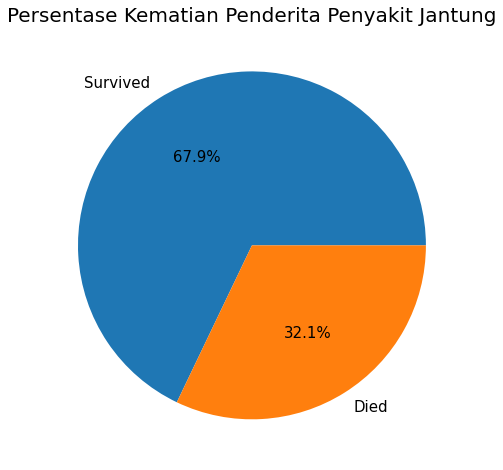

In [15]:
plt.figure(figsize=(8,8))
plt.pie(df['DEATH_EVENT'].value_counts().values.tolist(), labels=['Survived','Died'], autopct='%1.1f%%',textprops={'fontsize': 15})
plt.title('Persentase Kematian Penderita Penyakit Jantung', fontsize=20)
plt.show()

### 4.1. Numerical Feature

Cek korelasi antar feature numerikal pada dataset.

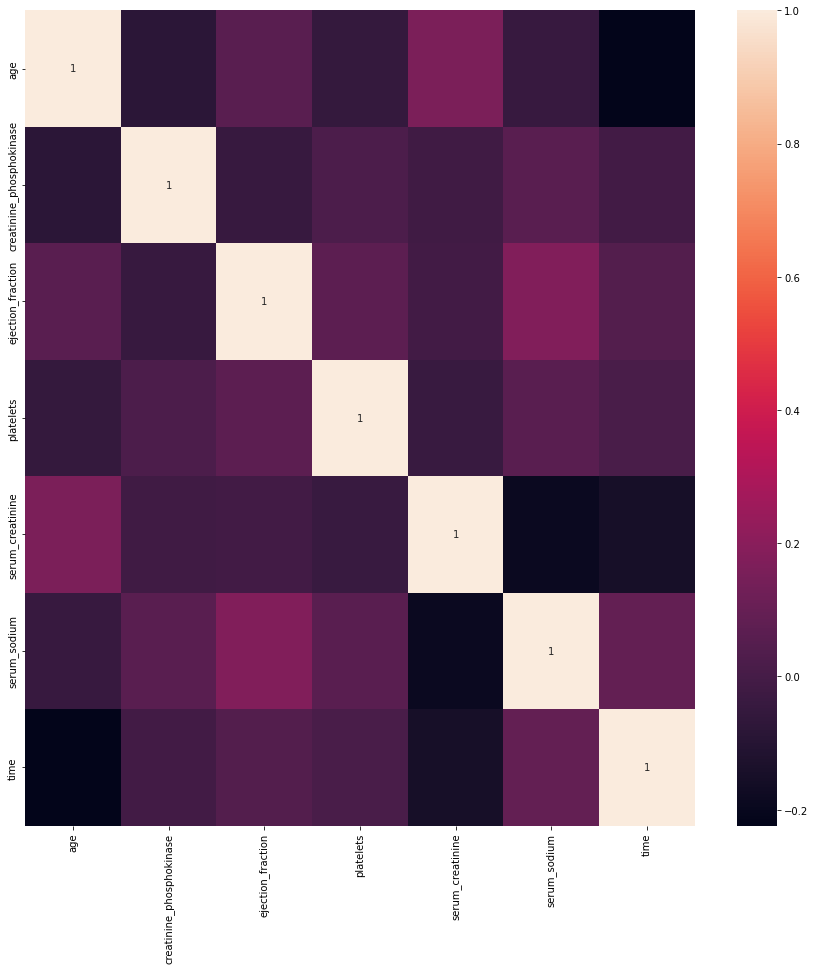

In [16]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df[num_cols].corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

Heatmap tidak menunjukkan ada feature yang memiliki korelasi yang signifikan dengan target maupun antar feature.

### 4.2. Categorical Feature

Selanjutnya eksplorasi kemungkinan korelasi target terhadap feature kategorik. Fungsi berikut merupakan fungsi umum yang digunakan untuk seluruh feature kategorik.

In [17]:
#function untuk plotting feature kategorik
def cat_plot(dataframe, feature):
    event_legend = {0: 'Survived', 1: 'Died'}
    feature_legend = {0: 'No', 1: 'Yes'}

    #grouping dataframe berdasarkan kolom feature
    feature_count = df[[feature,'DEATH_EVENT']] \
        .replace({'DEATH_EVENT':event_legend}) \
        .reset_index(drop=False) \
        .groupby([feature,'DEATH_EVENT']) \
        .count() \
        .sort_values(by=['DEATH_EVENT'],ascending=False) \
        .rename({'index':'count'},axis=1) \
        .reset_index()
    
    feature_chance = df[[feature,'DEATH_EVENT']] \
        .replace({feature:feature_legend}) \
        .groupby(feature) \
        .mean() \
        .reset_index()

    #plotting jumlah
    fig,ax = plt.subplots(1,2, figsize=(20,10))
    ax[0] = plt.subplot(1,2,1)
    ax[0] = sns.barplot(x=feature,y='count',data=feature_count,hue='DEATH_EVENT')
    ax[0].set_title('Jumlah Kematian Terhadap {Feature}'.format(Feature=feature))
    ax[0].set_xticklabels(['No','Yes'])

    #plotting rata-rata y atau peluang suatu feature untuk positif y
    ax[1] = plt.subplot(1,2,2)
    ax[1] = plt.bar(x=feature_chance[feature], height=feature_chance['DEATH_EVENT'])
    ax[1] = plt.title('Peluang {Feature} Terhadap Kematian Akibat Serangan Jantung'.format(Feature=feature))
    ax[1] = plt.ylabel('Peluang Kematian')
    ax[1] = plt.xlabel(feature)
    plt.show()

Cek pengaruh diabetes terhadap kematian dari serangan jantung.

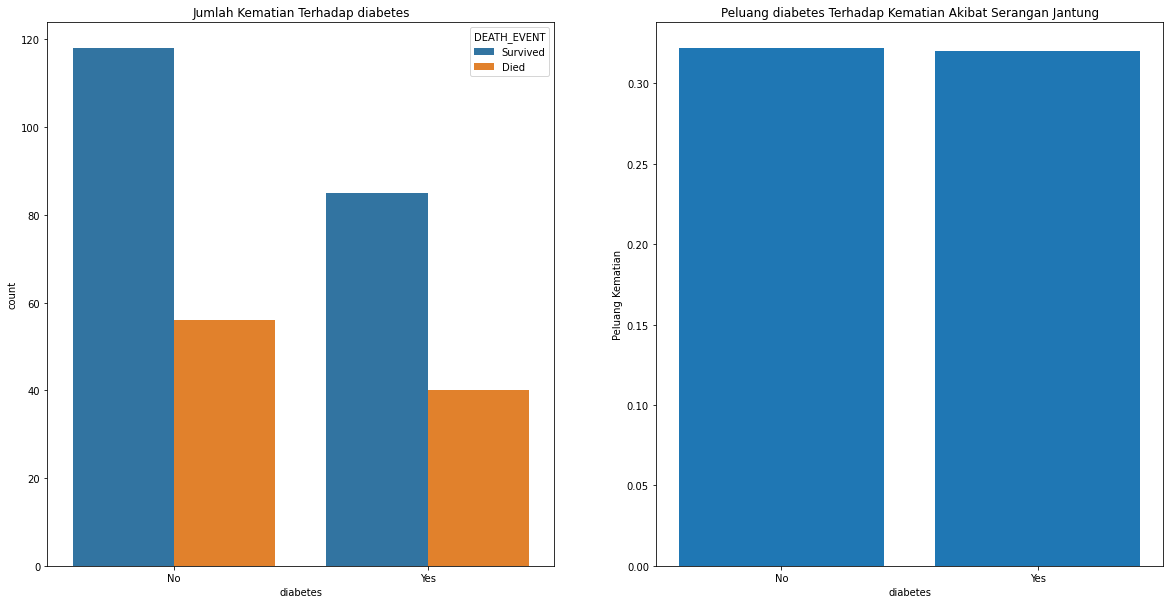

In [18]:
cat_plot(df,'diabetes')

Jika dilihat dari jumlah data, tidak bisa disimpulkan bahwa seseorang yang tidak mengidap diabetes tidak akan meninggal akibat serangan jantung. Jika dilihat peluangnya, baik yang mengidap diabetes ataupun tidak, memiliki peluang yang sama untuk mengalami serangan jantung.

Selanjutnya coba lihat client berdasarkan anemia.

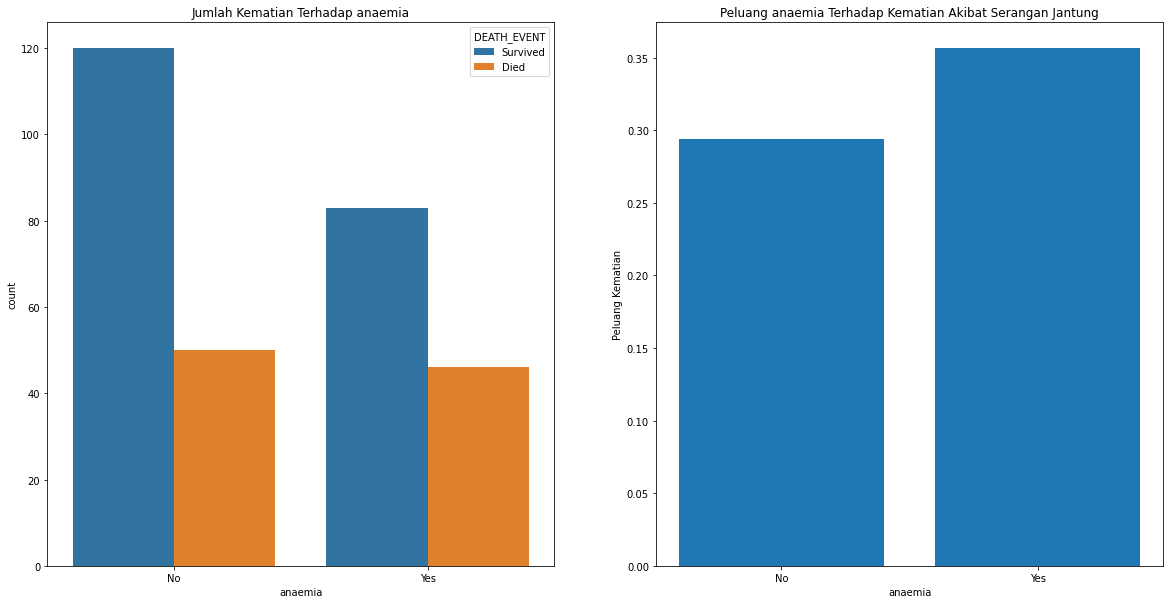

In [19]:
cat_plot(df,'anaemia')

Sama seperti diabetes, tidak bisa disimpulkan bahwa seseorang yang tidak mengidap anemia tidak akan meninggal akibat serangan jantung. Secara peluang, pengidap anemia memiliki kemungkinan lebih tinggi untuk meninggal akibat serangan jantung.

Cek pengaruh feature kategorik lainnya.

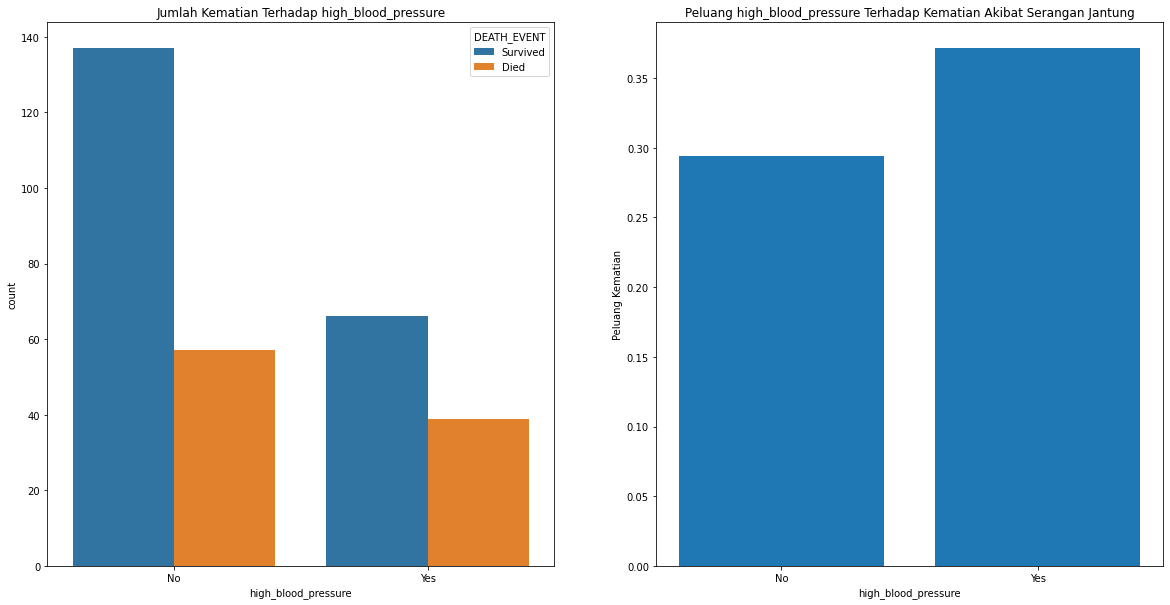

In [20]:
cat_plot(df,'high_blood_pressure')

Pengidap tekanan darah tinggi memiliki peluang yang lebih tinggi untuk mengalami kematian akibat serangan jantung.

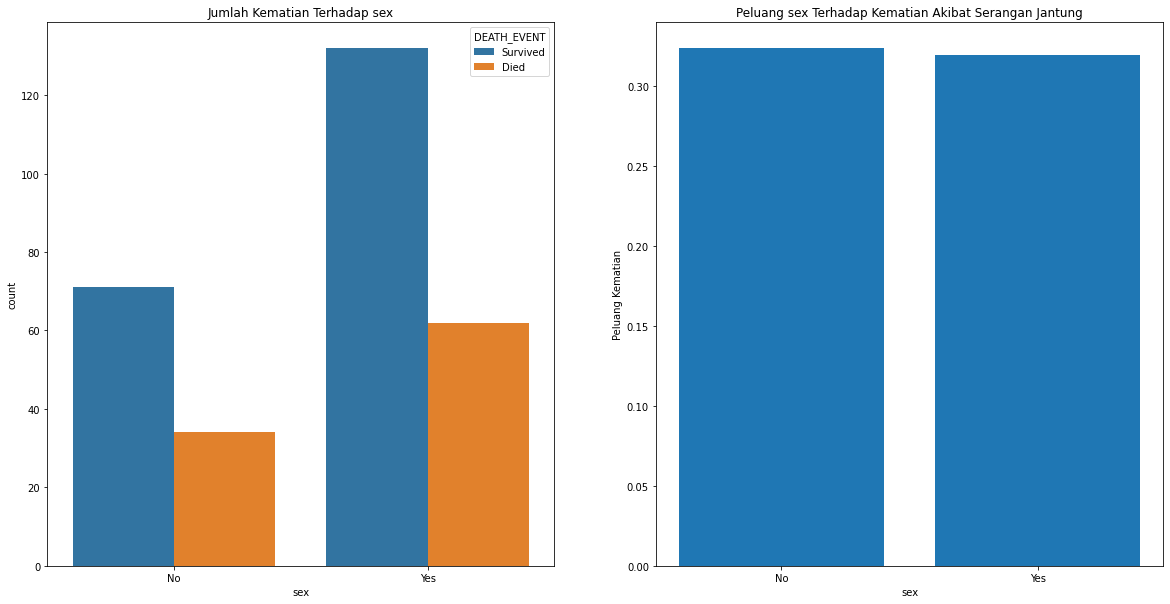

In [21]:
cat_plot(df,'sex')

Jenis kelamin tidak memiliki beda peluang yang signifikan terhadap kemungkinan mengalami kematian akibat serangan jantung.

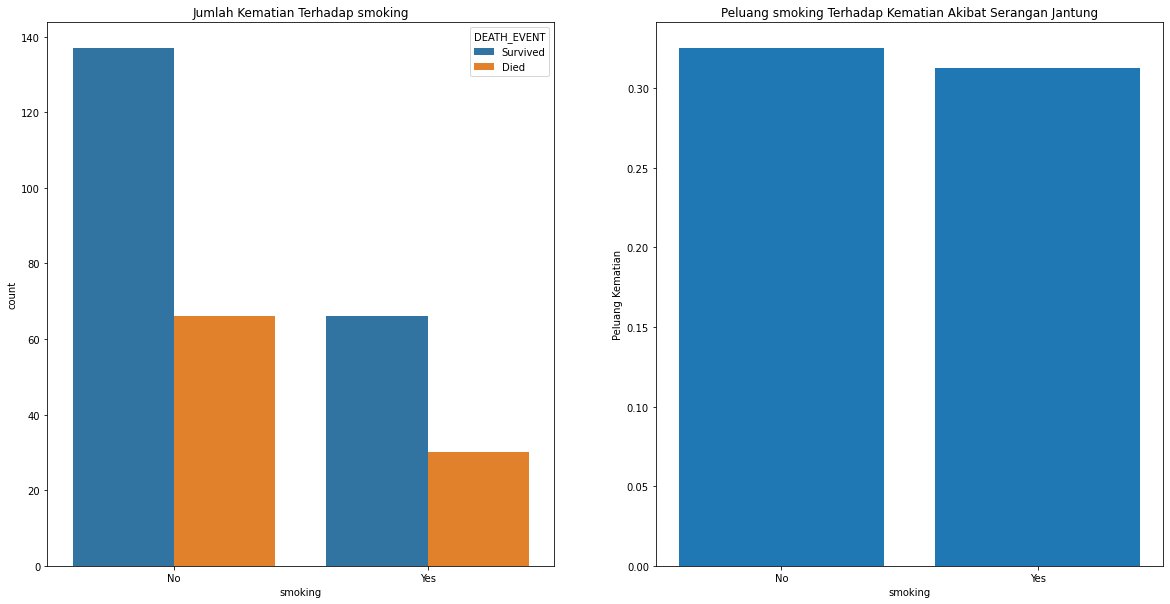

In [22]:
cat_plot(df,'smoking')

Grafik menujukkan hal yang cukup menarik. Orang yang tidak merokok malah menandakan kemungkinan yang lebih tinggi untuk mengalami kematian akibat serangan jantung.

### Cardinality

Kita perlu pastikan bahwa data yang kita gunakan tidak memiliki cardinality tinggi ataupun memiliki cardinality sama dengan satu.

In [23]:
df[cat_cols].nunique()

anaemia                2
diabetes               2
high_blood_pressure    2
sex                    2
smoking                2
dtype: int64

Tidak ada feature kategorik dengan cardinality yang tinggi ataupun cardinality sama dengan satu. Pastikan jumlah unique value pada setiap feature kategorik.

In [24]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts(),'\n')

anaemia
0    170
1    129
Name: anaemia, dtype: int64 

diabetes
0    174
1    125
Name: diabetes, dtype: int64 

high_blood_pressure
0    194
1    105
Name: high_blood_pressure, dtype: int64 

sex
1    194
0    105
Name: sex, dtype: int64 

smoking
0    203
1     96
Name: smoking, dtype: int64 



Tidak ada feature dengan jumlah kategori yang kecil sekali.

## 5. Data Preprocessing
Pada bab ini akan dilakukan pengolahan data sebelum digunakan untuk model.

### 5.1. Data Splitting

Tahap berikutnya adalah membagi data menjadi inference, train, validation, dan test set.

Ambil data untuk inferensial dan hapus data tersebut dari dataset yang akan dipisahkan menjadi train dan test set.

In [25]:
#data inference
df_inf = df.dropna().sample(3, random_state=random_state)
df_tt = df.drop(index=df_inf.index)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,60.000,1,47,0,20,0,204000.0,0.7,139,1,1,73,1
188,60.667,1,151,1,40,1,201000.0,1.0,136,0,0,172,0
63,45.000,0,582,0,35,0,385000.0,1.0,145,1,0,61,1


Deklarasikan feature dan target.

In [26]:
#deklarasi feature dan target
X = df_tt[num_cols+cat_cols]
y = df_tt['DEATH_EVENT']

Bagi data menjadi X (feature) dan y (target) untuk masing-masing train dan test set. Sample test set yang diambil sebanyak 20% dari total data pada dataset.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random_state,stratify=y)

Pastikan jumlah unique value antara train dan test set agar tidak ada kategori yang hilang dari kedua set.

In [28]:
X_train[cat_cols].nunique()

anaemia                2
diabetes               2
high_blood_pressure    2
sex                    2
smoking                2
dtype: int64

In [29]:
X_test[cat_cols].nunique()

anaemia                2
diabetes               2
high_blood_pressure    2
sex                    2
smoking                2
dtype: int64

Jumlah nilai kategorik sudah sama.

In [30]:
for i in cat_cols:
    print(i)
    print(X_train[i].value_counts(),'\n')

anaemia
0    131
1    105
Name: anaemia, dtype: int64 

diabetes
0    133
1    103
Name: diabetes, dtype: int64 

high_blood_pressure
0    151
1     85
Name: high_blood_pressure, dtype: int64 

sex
1    149
0     87
Name: sex, dtype: int64 

smoking
0    161
1     75
Name: smoking, dtype: int64 



### 5.2. Outliers Handling

Pisahkan feature kategorik dan feature numerik.

In [31]:
X_train_cat = X_train[cat_cols]
X_train_num = X_train[num_cols]

Buat fungsi untuk deteksi outlier.

In [32]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

Cek outlier pada setiap feature numerik.

In [33]:
#variable untuk summary
distribution = []
skewness = []
upper_limit = []
lower_limit = []
outliers_percent = []
max = []
min = []

#loop untuk summary outlier
for column in X_train_num.columns:

    #cek skewness
    col_skewness = X_train_num[column].skew()

    #conditional berdasarkan skewnewss
    if (col_skewness >= -0.5) & (col_skewness <= 0.5):
        col_distribution = 'Normal'
        col_upper_limit, col_lower_limit = find_normal_boundaries(X_train_num,column)      
    else:
        col_distribution = 'Skewed'
        col_upper_limit, col_lower_limit = find_skewed_boundaries(X_train_num,column)
    
    #cek min,max, dan jumlah outlier
    col_max = X_train_num[column].max()
    col_min = X_train_num[column].min()
    col_outliers_percent = (len(X_train_num[X_train_num[column] > col_upper_limit]) + len(X_train_num[X_train_num[column] < col_lower_limit])) / len(X_train_num) * 100
    
    #update summary per loop
    distribution.append(col_distribution)
    skewness.append(col_skewness)
    upper_limit.append(col_upper_limit)
    max.append(col_max)
    min.append(col_min)
    lower_limit.append(col_lower_limit)
    outliers_percent.append(col_outliers_percent)

#df summary
outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'min':min , 'lower_limit':lower_limit, 'upper_limit':upper_limit, 'max':max, 'outliers_percent':outliers_percent}
outliers_summary = pd.DataFrame(outliers_summary,index=X_train_num.columns)
outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
outliers_summary

,distribution_type,skewnewss,min,lower_limit,upper_limit,max,outliers_percent
serum_creatinine,Skewed,4.31,0.5,0.00,2.40,9.4,8.47
creatinine_phosphokinase,Skewed,5.09,23.0,-576.12,1276.88,7861.0,7.63
platelets,Skewed,0.62,25100.0,76375.00,437375.00,621000.0,7.63
serum_sodium,Skewed,-0.72,116.0,125.00,149.00,148.0,1.27
ejection_fraction,Skewed,0.56,14.0,7.50,67.50,80.0,0.85


Semua outlier pada data ini pada dasarnya masih merupakan nilai yang bisa ditemukan pada seseorang sehingga outlier akan dibiarkan.

### 5.4. Missing Values Detection

Tidak ada missing value pada keseluruhan dataset ini.

In [34]:
df.isnull().sum().sum()

0

### 5.5. Feature Engineering

Pada EDA kita sudah mengetahui bahwa `emp.var.rate`, `cons.price.idx`, `euribor3m`, dan `nr.employed` memiliki hubungan antar variabel yang kuat. Kumpulan feature ini akan diwakilkan dengan `emp.var.rate` saja. Pastikan kembali korelasinya dengan heatmap.

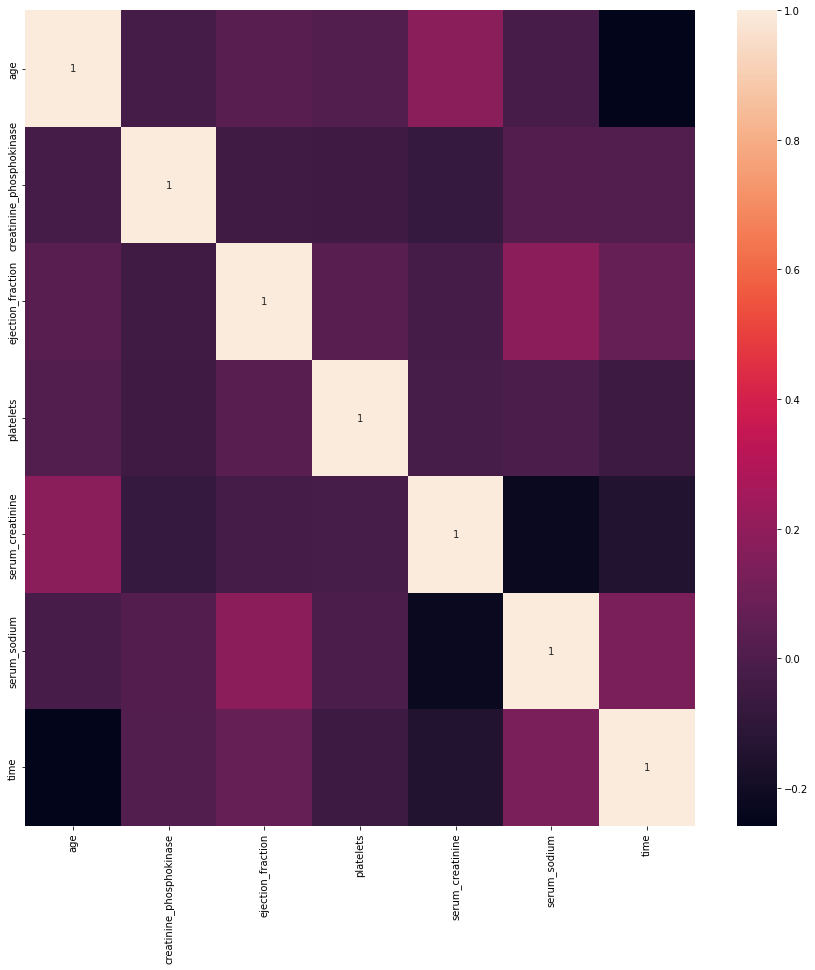

In [35]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(pd.concat([X_train_num],axis=1).corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

Karena antar feature tidak memiliki korelasi yang kuat, tidak ada feature yang di-drop.

Feature numerik yang digunakan adalah:

In [36]:
num_cols

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

Model nonlinear (dalam kasus ini adalah Random Forest dan AdaBoost) tidak memerlukan scaling.

Feature kategorik yang digunakan adalah:

In [37]:
cat_cols

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

Feature kategorik akan di-one-hot encode.

Buat Column Transformer untuk feature-feature tersebut.

In [38]:
#column transformer untuk semua feature yang dipilih
prepline = ColumnTransformer([
    ('onehot',OneHotEncoder(),cat_cols)
], remainder='passthrough')

## 6. Model Definition

Pada bab ini akan ditentukan model yang digunakan dan hyperparameter yang akan di-tuning.

Karena target-nya imbalance, maka scoring yang digunakan adalah `F1-weighted`.

### 6.1. Random Forest

Tuning parameter yang digunakan pada random forest adalah jumlah estimator/tree, max depth, min sample split, dan max feature.

In [39]:
#base model
rforest = RandomForestClassifier(random_state=random_state,n_jobs=-1)

#pipeline
pipe_rforest = Pipeline([
    ('prep',prepline),
    ('rforest',rforest)
])

#hyperparameter tuner
params_rforest = {
    'rforest__n_estimators':np.arange(50,210,50),
    'rforest__max_depth':np.arange(1,10,2),
    'rforest__min_samples_split':np.arange(2,10,2),
    'rforest__max_features':['None','sqrt','log2','auto']
}

### 6.2. AdaBoost

Tuning parameter yang digunakan adalah jumlah estimator, learning rate, dan jenis algoritma.

In [40]:
#base model
adaboost = AdaBoostClassifier(random_state=random_state)

#pipeline
pipe_adaboost = Pipeline([
    ('prep',prepline),
    ('adaboost',adaboost)
])

#hyperparameter tuner
params_adaboost = {
    'adaboost__n_estimators':np.arange(20,210,40),
    'adaboost__learning_rate':[0.01,0.05,0.1,0.5,1],
    'adaboost__algorithm':['SAMME','SAMME.R']
}

## 7. Model Training

Pada bab ini akan dilakukan fitting terhadap train set menggunakan masing-masing base model yang telah didefinisikan lalu dilakukan cross validation. Hasil cross validation akan disimpan pada tabel `estimator summary`.

In [41]:
model = ['random_forest','adaboost']
estimator = [pipe_rforest, pipe_adaboost]

mean_score = []
stdev_score = []

for est in estimator:
    est.fit(X_train,y_train)
    scores = cross_val_score(est,X_train,y_train,scoring='f1_weighted',cv=5,n_jobs=-1)
    
    mean_score.append(np.mean(scores))
    stdev_score.append(np.std(scores))

estimator_summary = pd.DataFrame({'estimator':model,'mean_score':mean_score,'stdev_score':stdev_score})
estimator_summary.sort_values(by='mean_score',ascending=False,inplace=True)
estimator_summary.reset_index(drop=True, inplace=True)

## 8. Model Evaluation

### 8.1. Cross Validation Result

Berikut hasil dari cross validation di bab sebelumnya.

In [42]:
estimator_summary

,estimator,mean_score,stdev_score
0,random_forest,0.853390,0.037111
1,adaboost,0.793158,0.085198


Dari hasil cross validation, diketahui bahwa model yang terbaik adalah model `Random Forest` diikuti oleh `AdaBoost`. Hal ini berdasarkan mean_score yang paling tinggi dan stdev_score juga yang rendah.

Kedua model tetap akan dilanjutkan untuk hyperparameter tuning dan nantinya akan dibandingkan model dengan hasil terbaik pada train dan test set.

### 8.2. Hyperparameter Tuning

Pengaruh parameter terhadap target pada masing-masing model akan divisualisasikan. Parameter terbaik dari grid search akan digunakan untuk memprediksi test set dan memastikan apakah model underfit, good fit, atau overfit.

In [43]:
#grid search Random Forest
grid_rforest = GridSearchCV(
    pipe_rforest, params_rforest, scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_rforest = grid_rforest.best_params_
best_pipe_rforest = grid_rforest.best_estimator_
df_result_rforest = pd.DataFrame.from_dict(grid_rforest.cv_results_,orient='columns')

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [ ]:
#grid search AdaBoost
grid_adaboost = GridSearchCV(
    pipe_adaboost, params_adaboost, scoring='f1_weighted', cv=5, n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_adaboost = grid_adaboost.best_params_
best_pipe_adaboost = grid_adaboost.best_estimator_
df_result_adaboost = pd.DataFrame.from_dict(grid_adaboost.cv_results_,orient='columns')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Buat fungsi untuk visualisasi pengaruh parameter terhadap `F1 weighted` score.

In [ ]:
#fungsi plot pengaruh parameter
def param_plot(dataframe):
    #param pada model
    params = [col for col in dataframe.columns if 'param_' in col]
    
    
    fig,ax = plt.subplots(1,len(params), figsize=(len(params)*5,5))
    fig.suptitle('Pengaruh Params terhadap Mean F1 wt.Score')
    #initialize while loop
    i = 0
    
    #while loop untuk plot masing-masing param
    while i < len(params):
        ax[i] = plt.subplot(1,len(params),i+1)
        sns.lineplot(data=dataframe,x=params[i],y='mean_test_score',ax=ax[i])
        ax[i] = plt.xticks(rotation=45)
        i += 1
    plt.show()

#### 8.2.1. Random Forest

Parameter terbaik yang dihasilkan adalah sebagai berikut:

In [ ]:
print(best_params_rforest)

{'rforest__max_depth': 9, 'rforest__max_features': 'sqrt', 'rforest__min_samples_split': 8, 'rforest__n_estimators': 200}


In [ ]:
df_result_rforest[df_result_rforest['params']==best_params_rforest]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rforest__max_depth,param_rforest__max_features,param_rforest__min_samples_split,param_rforest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
287,0.430675,0.031733,0.046208,0.010271,9,sqrt,8,200,"{'rforest__max_depth': 9, 'rforest__max_featur...",0.889085,0.806682,0.810079,0.916181,0.91085,0.866575,0.048387,1


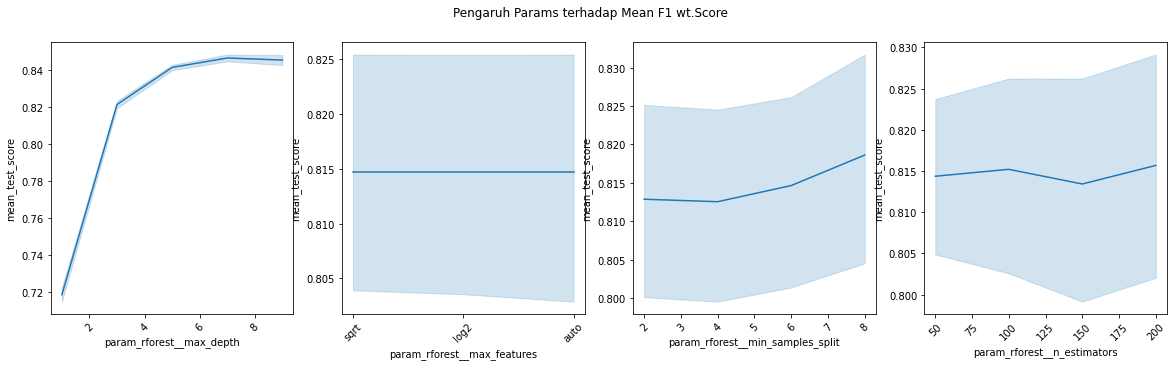

In [ ]:
param_plot(df_result_rforest)

Dari parameter yang di-tuning untuk `Random Forest`, berikut pengaruhnya terhadap mean test score (F1 weighted):
- `max_depth`: memiliki pengaruh signifikan hingga 5, setelah itu perubahan terhadap akurasi tidak signifikan
- `max_features`: semua metode terlihat memiliki stabilitas yang kurang baik dilihat dari rentang mean test score-nya, tetapi pada grafik terlihat kalau `sqrt` memiliki sebaran yang lebih sempit
- `min_samples_split`: akurasi meningkat hingga nilai tertinggi didapat pada 8
- `n_estimators`: akurasi naik sampai estimator 100, setelah itu turun dan naik lagi di puncaknya pada estimator 200

Jika dilihat dari parameter-nya, kemungkinan besar model ini overfit karena `max_depth` sudah mendekati jumlah feature. Lihat performanya pada classification report dan hasil ujinya di subbab berikutnya.

In [ ]:
print(classification_report(y_train,best_pipe_rforest.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       161
           1       0.97      0.95      0.96        75

    accuracy                           0.97       236
   macro avg       0.97      0.97      0.97       236
weighted avg       0.97      0.97      0.97       236



Model yang dihasilkan dapat memprediksi dengan hampir sempurna untuk kedua kelas.

#### 8.2.2. AdaBoost

Parameter terbaik yang dihasilkan adalah sebagai berikut:

In [ ]:
print(best_params_adaboost)

{'adaboost__algorithm': 'SAMME', 'adaboost__learning_rate': 0.5, 'adaboost__n_estimators': 20}


In [ ]:
df_result_adaboost[df_result_adaboost['params']==best_params_adaboost]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_adaboost__algorithm,param_adaboost__learning_rate,param_adaboost__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.029305,0.00175,0.005701,0.0004,SAMME,0.5,20,"{'adaboost__algorithm': 'SAMME', 'adaboost__le...",0.868956,0.777125,0.829787,0.894489,0.886833,0.851438,0.043369,1


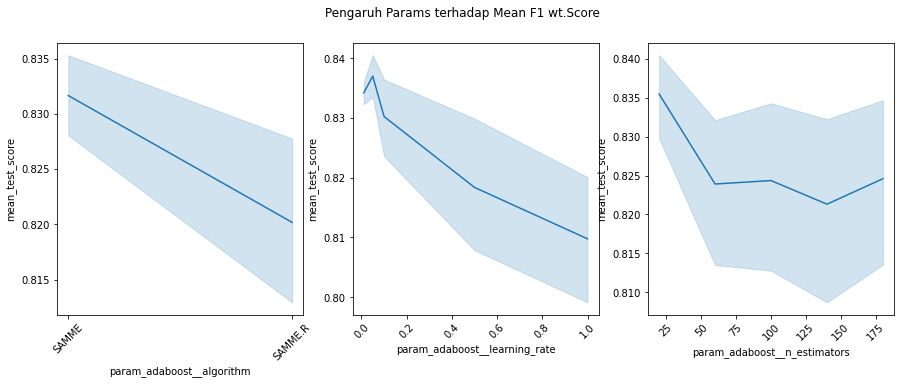

In [ ]:
param_plot(df_result_adaboost)

Dari tiga parameter pada tuning `AdaBoost`, ketiga-tiganya memiliki pengaruh terhadap `F1 weighted` score sebagai berikut:
- SAMME diidentifikasi memiliki akurasi lebih baik dibandingkan SAMME.R
- Akurasi tertinggi dicapai pada learning rate sekitar 0.05, kemudian turun ketika mendekati 1
- Kenaikan jumlah estimator tidak sejalan dengan nilai test score, tetapi sebaran terkecil didapat pada jumlah estimator 25

Berikut classification report yang dihasilkan dari train set.

In [ ]:
print(classification_report(y_train,best_pipe_adaboost.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       161
           1       0.89      0.83      0.86        75

    accuracy                           0.91       236
   macro avg       0.90      0.89      0.90       236
weighted avg       0.91      0.91      0.91       236



Model dapat memprediksi penderita serangan jantung yang tidak meninggal dengan baik, tetapi performanya untuk mendeteksi penderita yang meninggal tidak sama baiknya. Pastikan akurasi model pada test set.

### 8.3. Evaluate Test Set

Gunakan best pipeline yang telah dibuat untuk memprediksi test set.

In [ ]:
#uji fit
print('Random Forest')
print('F1 weighted score Train:',f1_score(y_train, best_pipe_rforest.predict(X_train), average='weighted'))
print('F1 weighted score Test:',f1_score(y_test, best_pipe_rforest.predict(X_test), average='weighted'))

Random Forest
F1 weighted score Train: 0.974482957533805
F1 weighted score Test: 0.827405380756954


In [ ]:
#uji fit
print('AdaBoost')
print('F1 weighted score Train:',f1_score(y_train, best_pipe_adaboost.predict(X_train), average='weighted'))
print('F1 weighted score Test:',f1_score(y_test, best_pipe_adaboost.predict(X_test), average='weighted'))

AdaBoost
F1 weighted score Train: 0.9101630571745692
F1 weighted score Test: 0.8462184873949582


Hasil prediksi kedua model ternyata overfit dengan selisih terbesar pada Random Forest. Disimpulkan bahwa model `AdaBoost` memiliki fit yang lebih baik dibanding `Random Forest`.

## 9. Model Inference

Lakukan inference menggunakan inference set.

In [ ]:
df_inf['y-pred-adaboost'] = best_pipe_adaboost.predict(df_inf)
df_inf['y-pred-rforest'] = best_pipe_rforest.predict(df_inf)
df_inf[['y-pred-adaboost','y-pred-rforest']]

,y-pred-adaboost,y-pred-rforest
75,0,0
188,0,0
63,1,0


Model berhasil memprediksi menggunakan data dari inference set dan ada perbedaan hasil prediksi pada indeks 63.

## 10. Pengambilan Kesimpulan

Berdasarkan analisis yang telah dilakukan, berikut beberapa hal yang disimpulkan:
1. Semua feature digunakan pada modeling
2. Parameter terbaik untuk masing-masing model adalah :
    - Random Forest:
        - max_depth: 9
        - max_features: sqrt
        - min_samples_split: 8
        - n_estimators: 200
    - AdaBoost:
        - learning_rate: 0.5
        - n_estimators: 20
        - algorithm: SAMME
3. Model yang dihasilkan dapat memprediksi ketika penderita tidak meninggal dengan baik, tetapi performa menurun ketika mendeteksi penderita yang meninggal.
4. Kedua Model yang dihasilkan `Overfit` antara train set dan test set, baik Random Forest maupun AdaBoost. Model AdaBoost memiliki selisih akurasi yang lebih kecil antara train dan test set